In [80]:
import os
from dotenv import load_dotenv
load_dotenv()

import pandas as pd
import matplotlib.pyplot as plt
import unidecode
pd.set_option('display.max_columns', None)

In [30]:
def clean_string(s):
    s =str(s)
    s = s.lower()  # Mettre en minuscules
    s = unidecode.unidecode(s)  # Supprimer les accents
    s = s.replace("'", "")  # Enlever les apostrophes
    s = s.replace(" ", "_").replace("-", "_")  # Remplacer les espaces et tirets par des underscores
    return s

In [70]:
ville_dep_reg = pd.read_csv("../open_data_soft/ville_dep_reg.csv")

In [71]:
ville_dep_reg.head()

,ville,departement,region,zip_code,department_code,region_code,gps_lng,gps_lat
0,labergement_clemenciat,ain,auvergne_rhone_alpes,1400.0,01,84,4.924699,46.156782
1,labergement_de_varey,ain,auvergne_rhone_alpes,1640.0,01,84,5.428759,46.010086
2,amberieu_en_bugey,ain,auvergne_rhone_alpes,1500.0,01,84,5.375992,45.958409
3,amberieux_en_dombes,ain,auvergne_rhone_alpes,1330.0,01,84,4.910602,46.000120
4,ambleon,ain,auvergne_rhone_alpes,1300.0,01,84,5.602492,45.746427


In [180]:
synop = pd.read_csv("../open_data_soft/donnees-synop-essentielles-omm.csv", sep=";")

In [72]:
jcdecaux = pd.read_parquet("../open_data_soft/jcdecaux_bike_data.parquet")

osm_bicycle = pd.read_parquet("../open_data_soft/osm-france-bicycle-parking.parquet")

In [74]:
ville_dep_reg.head()

,ville,departement,region,zip_code,department_code,region_code,gps_lng,gps_lat
0,labergement_clemenciat,ain,auvergne_rhone_alpes,1400.0,01,84,4.924699,46.156782
1,labergement_de_varey,ain,auvergne_rhone_alpes,1640.0,01,84,5.428759,46.010086
2,amberieu_en_bugey,ain,auvergne_rhone_alpes,1500.0,01,84,5.375992,45.958409
3,amberieux_en_dombes,ain,auvergne_rhone_alpes,1330.0,01,84,4.910602,46.000120
4,ambleon,ain,auvergne_rhone_alpes,1300.0,01,84,5.602492,45.746427


In [75]:
for col in ["ville", "departement", "region"]:
    ville_dep_reg[col] = ville_dep_reg[col].apply(clean_string)

jcdecaux["ville"] = jcdecaux["contract_name"].apply(clean_string)

In [181]:
synop["departement"] = synop["department (name)"].apply(clean_string)
synop["region"] = synop["region (name)"].apply(clean_string)
synop["ville"] = synop["communes (name)"].apply(clean_string)

In [76]:
jcdecaux.head()

,number,name,address,position,banking,bonus,status,contract_name,bike_stands,available_bike_stands,available_bikes,last_update,ville
0,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse
1,56103,56103 - ERA03 - GARE D'ERAGNY (CB),RUE DES BELLES HÂTES ANGLE BOULEVARD DES AVIAT...,b'\x01\x01\x00\x00\x00\xbe\xb90\xf9k\xba\x00@^...,False,False,OPEN,cergy-pontoise,20,15,5,2024-10-26 00:18:55,cergy_pontoise
2,23,023 - MAURICE SERVAIS,023 - MAURICE SERVAIS - PLACE MAURICE SERVAIS ...,b'\x01\x01\x00\x00\x00\xd9wE\xf0\xbfu\x13@\xd0...,False,False,OPEN,namur,10,6,3,2024-10-18 03:45:19,namur
3,8029,8029 - ETATS-UNIS / LÉVIGNE,81 BVD DES Etats-Unis,b'\x01\x01\x00\x00\x00\x95\xf2Z\t\xddu\x13@\xe...,False,False,CLOSED,lyon,20,0,0,2024-10-17 11:30:17,lyon
4,168,168_AVDA. MALVARROSA,Malvarrosa - Río Tajo,b'\x01\x01\x00\x00\x00\x1eG\xe8B\x97\xfd\xd4\x...,False,False,OPEN,valence,15,0,0,2024-09-27 05:33:36,valence


In [77]:
jcdecaux = pd.merge(jcdecaux, ville_dep_reg, how='left', on="ville" )

In [104]:
jcdecaux.head()

,number,name,address,position,banking,bonus,status,contract_name,bike_stands,available_bike_stands,available_bikes,last_update,ville,departement,region,zip_code,department_code,region_code,gps_lng,gps_lat,date_day,date
0,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31000.0,31,76,1.444205,43.604626,2024-10-27,2024-10-27 14:31:33
1,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31100.0,31,76,1.395169,43.561822,2024-10-27,2024-10-27 14:31:33
2,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31200.0,31,76,1.433805,43.638167,2024-10-27,2024-10-27 14:31:33
3,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31300.0,31,76,1.390343,43.605107,2024-10-27,2024-10-27 14:31:33
4,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31400.0,31,76,1.453135,43.561103,2024-10-27,2024-10-27 14:31:33


In [134]:
jcdecaux["status"].unique()

array(['OPEN', 'CLOSED'], dtype=object)

In [110]:
synop.head()

,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,Visibilité horizontale,Temps présent,Temps passé 1,Temps passé 2,Nebulosité totale,Nébulosité des nuages de l' étage inférieur,Hauteur de la base des nuages de l'étage inférieur,Type des nuages de l'étage inférieur,Type des nuages de l'étage moyen,Type des nuages de l'étage supérieur,Pression station,Niveau barométrique,Géopotentiel,Variation de pression en 24 heures,Température minimale sur 12 heures,Température minimale sur 24 heures,Température maximale sur 12 heures,Température maximale sur 24 heures,Température minimale du sol sur 12 heures,Méthode de mesure Température du thermomètre mouillé,Température du thermomètre mouillé,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Etat du sol,"Hauteur totale de la couche de neige, glace, autre au sol",Hauteur de la neige fraîche,Periode de mesure de la neige fraiche,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Précipitations dans les 24 dernières heures,Phénomène spécial 1,Phénomène spécial 2,Phénomène spécial 3,Phénomène spécial 4,Nébulosité couche nuageuse 1,Type nuage 1,Hauteur de base 1,Nébulosité couche nuageuse 2,Type nuage 2,Hauteur de base 2,Nébulosité couche nuageuse 3,Type nuage 3,Hauteur de base 3,Nébulosité couche nuageuse 4,Type nuage 4,Hauteur de base 4,Coordonnees,Nom,Type de tendance barométrique.1,Temps passé 1.1,Temps présent.1,Température (°C),Température minimale sur 12 heures (°C),Température minimale sur 24 heures (°C),Température maximale sur 12 heures (°C),Température maximale sur 24 heures (°C),Température minimale du sol sur 12 heures (en °C),Latitude,Longitude,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee,departement,region,ville,date,date_day
0,7558,2010-01-05T10:00:00+01:00,100280.0,-50.0,5.0,260.0,1.5,275.75,275.75,100.0,4000.0,50.0,5.0,5.0,100.0,8.0,250.0,37.0,61.0,60.0,91870.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.1,-10.0,NaN,NaN,0.0,-30.0,0.0,0.4,NaN,NaN,NaN,710.0,1102.0,3100.0,NaN,6.0,7.0,180.0,7.0,6.0,480.0,NaN,NaN,NaN,NaN,NaN,NaN,"44.1185, 3.0195",MILLAU,"En baisse, puis en hausse, la pression atmosph...",Bruine,"Bruine, sans congélation, intermittente, faibl...",2.6,NaN,NaN,NaN,NaN,NaN,44.118500,3.019500,712,Millau,12145,CC de Millau Grands Causses,241200567.0,Aveyron,12,Occitanie,76.0,1,aveyron,occitanie,millau,2010-01-05 10:00:00+01:00,2010-01-05
1,61976,2010-01-05T10:00:00+01:00,100990.0,NaN,NaN,NaN,NaN,305.45,299.05,69.0,50000.0,2.0,1.0,1.0,60.0,1.0,800.0,32.0,20.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2439.0,NaN,NaN,NaN,1.0,8.0,600.0,5.0,0.0,7500.0,NaN,NaN,NaN,NaN,NaN,NaN,"-15.887667, 54.520667",TROMELIN,NaN,Nuages couvrant plus de la moitié du ciel pend...,État du ciel inchangé dans l’ensemble,32.3,NaN,NaN,NaN,NaN,NaN,-15.887667,54.520667,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,nan,nan,nan,2010-01-05 10:00:00+01:00,2010-01-05
2,7027,2010-01-05T13:00:00+01:00,100720.0,-190.0,8.0,200.0,3.6,273.65,271.75,87.0,12000.0,2.0,1.0,1.0,75.0,6.0,800.0,35.0,20.0,10.0,99880.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.1,-10.0,NaN,NaN,0.0,-60.0,0.0,0.0,0.0,NaN,NaN,710.0,1105.0,3100.0,NaN,3.0,6.0,810.0,6.0,6.0,1200.0,NaN,NaN,NaN,NaN,NaN,NaN,"49.18, -0.456167",CAEN-CARPIQUET,"Stationnaire ou en hausse, puis en baisse, ou ...",Nuages couvrant plus de la moitié du ciel pend...,État du ciel inchangé dans l’ensemble,0.5,NaN,NaN,NaN,NaN,NaN,49.180000,-0.456167,67,Carpiquet,14137,CU Caen la Mer,200065597.0,Calvados,14,Normandie,28.0,1,calvados,normandie,carpiquet,2010-01-05 13:00:00+01:00,2010-01-05
3,7110,2010-01-05T13:00:00+01:00,100

In [182]:
synop["date_day"] = synop["Date"].apply(lambda x: str(x).split('T')[0])

In [183]:
synop["date_day"] = pd.to_datetime(synop["date_day"], format="%Y-%m-%d")

In [120]:
df = pd.merge(jcdecaux, synop, how="left", on=["date_day","departement"] )

In [121]:
df.head()

,number,name,address,position,banking,bonus,status,contract_name,bike_stands,available_bike_stands,available_bikes,last_update,ville_x,departement,region_x,zip_code,department_code,region_code,gps_lng,gps_lat,date_day,date_x,ID OMM station,Date,Pression au niveau mer,Variation de pression en 3 heures,Type de tendance barométrique,Direction du vent moyen 10 mn,Vitesse du vent moyen 10 mn,Température,Point de rosée,Humidité,Visibilité horizontale,Temps présent,Temps passé 1,Temps passé 2,Nebulosité totale,Nébulosité des nuages de l' étage inférieur,Hauteur de la base des nuages de l'étage inférieur,Type des nuages de l'étage inférieur,Type des nuages de l'étage moyen,Type des nuages de l'étage supérieur,Pression station,Niveau barométrique,Géopotentiel,Variation de pression en 24 heures,Température minimale sur 12 heures,Température minimale sur 24 heures,Température maximale sur 12 heures,Température maximale sur 24 heures,Température minimale du sol sur 12 heures,Méthode de mesure Température du thermomètre mouillé,Température du thermomètre mouillé,Rafale sur les 10 dernières minutes,Rafales sur une période,Periode de mesure de la rafale,Etat du sol,"Hauteur totale de la couche de neige, glace, autre au sol",Hauteur de la neige fraîche,Periode de mesure de la neige fraiche,Précipitations dans la dernière heure,Précipitations dans les 3 dernières heures,Précipitations dans les 6 dernières heures,Précipitations dans les 12 dernières heures,Précipitations dans les 24 dernières heures,Phénomène spécial 1,Phénomène spécial 2,Phénomène spécial 3,Phénomène spécial 4,Nébulosité couche nuageuse 1,Type nuage 1,Hauteur de base 1,Nébulosité couche nuageuse 2,Type nuage 2,Hauteur de base 2,Nébulosité couche nuageuse 3,Type nuage 3,Hauteur de base 3,Nébulosité couche nuageuse 4,Type nuage 4,Hauteur de base 4,Coordonnees,Nom,Type de tendance barométrique.1,Temps passé 1.1,Temps présent.1,Température (°C),Température minimale sur 12 heures (°C),Température minimale sur 24 heures (°C),Température maximale sur 12 heures (°C),Température maximale sur 24 heures (°C),Température minimale du sol sur 12 heures (en °C),Latitude,Longitude,Altitude,communes (name),communes (code),EPCI (name),EPCI (code),department (name),department (code),region (name),region (code),mois_de_l_annee,region_y,ville_y,date_y
0,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31000.0,31,76,1.444205,43.604626,2024-10-27,2024-10-27 14:31:33,7630.0,2024-10-27T13:00:00+01:00,102110.0,110.0,0.0,20.0,1.5,288.35,284.75,79.0,49310.0,0.0,NaN,NaN,100.0,8.0,450.0,NaN,NaN,NaN,100320.0,NaN,NaN,760.0,NaN,NaN,NaN,NaN,285.55,NaN,NaN,3.7,4.5,-10.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.2,1.4,NaN,NaN,NaN,NaN,7.0,NaN,480.0,8.0,NaN,1380.0,NaN,NaN,NaN,NaN,NaN,NaN,"43.621, 1.378833",TOULOUSE-BLAGNAC,"En hausse, puis en baisse la pression atmosphé...",NaN,On n’a pas observé d’évolution des nuages ou o...,15.2,NaN,NaN,NaN,NaN,12.4,43.621,1.378833,151.0,Blagnac,31069,Toulouse Métropole,243100518.0,Haute-Garonne,31,Occitanie,76.0,10.0,occitanie,blagnac,2024-10-27 13:00:00+01:00
1,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31000.0,31,76,1.444205,43.604626,2024-10-27,2024-10-27 14:31:33,7630.0,2024-10-27T02:00:00+02:00,101600.0,80.0,3.0,280.0,2.0,285.45,284.65,95.0,16660.0,51.0,NaN,NaN,100.0,8.0,250.0,NaN,NaN,NaN,99810.0,NaN,NaN,-160.0,NaN,NaN,NaN,NaN,286.05,NaN,NaN,2.9,4.0,-10.0,2.0,0.0,NaN,NaN,-0.1,0.4,0.8,1.2,1.4,NaN,NaN,NaN,NaN,6.0,NaN,270.0,7.0,NaN,420.0,8.0,NaN,1470.0,NaN,NaN,NaN,"43.621, 1.378833",TOULOUSE-BLAGNAC,"En baisse ou stationnaire, puis en hausse, ou ...",NaN,"Bruine, sans congélation, continue, faible au ...",12.3,NaN,NaN,NaN,NaN,12.9,43.621,1.378833,151.0,Blagnac,31069,Toulouse Métropole,243100518.0,Hau

In [128]:
df = df.rename(columns={ k : clean_string(k) for k in df.columns})

In [130]:
for col in df.columns:
    print(f"'{col}',")

'number',
'name',
'address',
'position',
'banking',
'bonus',
'status',
'contract_name',
'bike_stands',
'available_bike_stands',
'available_bikes',
'last_update',
'ville_x',
'departement',
'region_x',
'zip_code',
'department_code',
'region_code',
'gps_lng',
'gps_lat',
'date_day',
'date_x',
'id_omm_station',
'date',
'pression_au_niveau_mer',
'variation_de_pression_en_3_heures',
'type_de_tendance_barometrique',
'direction_du_vent_moyen_10_mn',
'vitesse_du_vent_moyen_10_mn',
'temperature',
'point_de_rosee',
'humidite',
'visibilite_horizontale',
'temps_present',
'temps_passe_1',
'temps_passe_2',
'nebulosite_totale',
'nebulosite__des_nuages_de_l_etage_inferieur',
'hauteur_de_la_base_des_nuages_de_letage_inferieur',
'type_des_nuages_de_letage_inferieur',
'type_des_nuages_de_letage_moyen',
'type_des_nuages_de_letage_superieur',
'pression_station',
'niveau_barometrique',
'geopotentiel',
'variation_de_pression_en_24_heures',
'temperature_minimale_sur_12_heures',
'temperature_minimale_sur_24_heur

In [131]:
df = df[[
'address',
'banking',
'bonus',
'status',
'bike_stands',
'available_bike_stands',
'available_bikes',
'ville_x',
'departement',
'gps_lng',
'gps_lat',
'date_day',
'pression_au_niveau_mer',
'temperature',
'point_de_rosee',
'humidite',
'visibilite_horizontale',
'temps_present',
'nebulosite_totale',
'pression_station',
'variation_de_pression_en_24_heures',
'temperature_minimale_sur_24_heures',
'temperature_maximale_sur_24_heures',
'temperature_du_thermometre_mouille',
'rafale_sur_les_10_dernieres_minutes',
'rafales_sur_une_periode',
'periode_de_mesure_de_la_rafale',
'etat_du_sol',
'hauteur_totale_de_la_couche_de_neige,_glace,_autre_au_sol',
'hauteur_de_la_neige_fraiche',
'precipitations_dans_les_24_dernieres_heures',
'type_de_tendance_barometrique.1',
'temps_present.1',
'latitude',
'longitude',
'altitude',
'region_y',
'ville_y',
]]

In [136]:
df = df.rename(columns={
    "adress" : "address_localisation_velo",
    "ville_x" : "ville",
    "ville_y" : "ville_station_meteo",
    "region_y" : "region",
    "gps_lng" : "longitude_velo",
    "gps_lat" : "latitude_velo",
    "longitude" : "longitude_station_meteo",
    "latitude" : "latitude_station_meteo",
})

In [138]:
df.to_parquet('../open_data_soft/velos_meteo.parquet', index=False)

In [139]:
df.head()

,address,banking,bonus,status,bike_stands,available_bike_stands,available_bikes,ville,departement,longitude_velo,latitude_velo,date_day,pression_au_niveau_mer,temperature,point_de_rosee,humidite,visibilite_horizontale,temps_present,nebulosite_totale,pression_station,variation_de_pression_en_24_heures,temperature_minimale_sur_24_heures,temperature_maximale_sur_24_heures,temperature_du_thermometre_mouille,rafale_sur_les_10_dernieres_minutes,rafales_sur_une_periode,periode_de_mesure_de_la_rafale,etat_du_sol,"hauteur_totale_de_la_couche_de_neige,_glace,_autre_au_sol",hauteur_de_la_neige_fraiche,precipitations_dans_les_24_dernieres_heures,type_de_tendance_barometrique.1,temps_present.1,latitude_station_meteo,longitude_station_meteo,altitude,region,ville_station_meteo
0,1 IMPASSE BACHAGA BOUALAM,False,False,OPEN,18,0,0,toulouse,haute_garonne,1.444205,43.604626,2024-10-27,102110.0,288.35,284.75,79.0,49310.0,0.0,100.0,100320.0,760.0,NaN,NaN,NaN,3.7,4.5,-10.0,0.0,0.0,NaN,1.4,"En hausse, puis en baisse la pression atmosphé...",On n’a pas observé d’évolution des nuages ou o...,43.621,1.378833,151.0,occitanie,blagnac
1,1 IMPASSE BACHAGA BOUALAM,False,False,OPEN,18,0,0,toulouse,haute_garonne,1.444205,43.604626,2024-10-27,101600.0,285.45,284.65,95.0,16660.0,51.0,100.0,99810.0,-160.0,NaN,NaN,NaN,2.9,4.0,-10.0,2.0,0.0,NaN,1.4,"En baisse ou stationnaire, puis en hausse, ou ...","Bruine, sans congélation, continue, faible au ...",43.621,1.378833,151.0,occitanie,blagnac
2,1 IMPASSE BACHAGA BOUALAM,False,False,OPEN,18,0,0,toulouse,haute_garonne,1.444205,43.604626,2024-10-27,102010.0,285.35,284.45,94.0,11890.0,0.0,100.0,100210.0,570.0,NaN,NaN,NaN,3.3,3.5,-10.0,1.0,0.0,NaN,1.4,"En hausse, puis stationnaire, ou en hausse, pu...",On n’a pas observé d’évolution des nuages ou o...,43.621,1.378833,151.0,occitanie,blagnac
3,1 IMPASSE BACHAGA BOUALAM,False,False,OPEN,18,0,0,toulouse,haute_garonne,1.444205,43.604626,2024-10-27,101650.0,285.15,284.35,95.0,3640.0,61.0,100.0,99850.0,20.0,NaN,NaN,NaN,3.0,3.0,-10.0,2.0,0.0,NaN,1.6,"En hausse, puis en baisse la pression atmosphé...","Pluie, sans congélation, continue, faible au m...",43.621,1.378833,151.0,occitanie,blagnac
4,1 IMPASSE BACHAGA BOUALAM,False,False,OPEN,18,0,0,toulouse,haute_garonne,1.444205,43.604626,2024-10-27,102340.0,287.55,284.85,84.0,55110.0,0.0,100.0,100550.0,970.0,NaN,NaN,NaN,2.6,3.7,-10.0,0.0,0.0,NaN,1.0,"En baisse ou stationnaire, puis en hausse, ou ...",On n’a pas observé d’évolution des nuages ou o...,43.621,1.378833,151.0,occitanie,blagnac


In [146]:
df["temperature"] = df["temperature"].apply(lambda x: x-273)

In [155]:
res = df.groupby('date_day', as_index=False).agg(
    {
        'temperature': 'mean', 
        'available_bike_stands': 'mean', 
        'bike_stands' : 'mean',
        'available_bikes' : 'mean',
        'rafale_sur_les_10_dernieres_minutes' : 'mean',
        'humidite' : 'mean',
        'visibilite_horizontale':'mean', 
        'precipitations_dans_les_24_dernieres_heures' : 'mean',
    }
)

In [148]:
res.head()

,date_day,temperature,available_bike_stands,bike_stands,available_bikes,humidite,visibilite_horizontale,precipitations_dans_les_24_dernieres_heures
0,2022-01-18,1.8875,6.0,0.0,0.0,89.750,8312.50,-0.0250
1,2022-03-16,NaN,15.0,15.0,0.0,NaN,NaN,NaN
2,2022-03-22,11.5125,13.0,15.0,0.0,47.750,28026.25,0.0000
3,2022-04-06,10.7750,0.0,9.0,0.0,65.750,35528.75,0.0000
4,2022-05-23,16.2250,0.0,0.0,0.0,85.625,35961.25,19.2375


In [143]:
import seaborn as sns

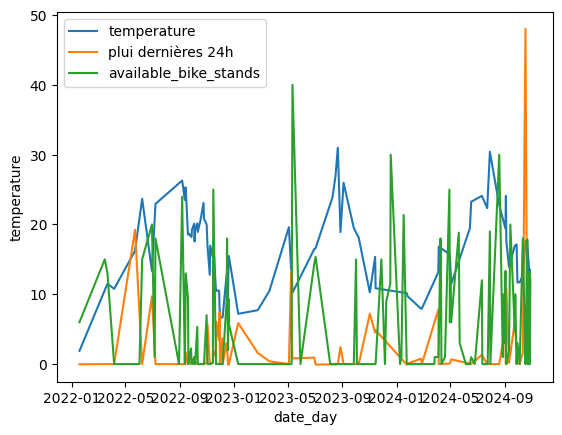

In [166]:
sns.lineplot(data=res, x= "date_day", y = "temperature", label = "temperature" )
sns.lineplot(data=res, x= "date_day", y = "precipitations_dans_les_24_dernieres_heures",  label = "plui dernières 24h" )
sns.lineplot(data=res, x= "date_day", y = "available_bike_stands",  label = "available_bike_stands" )
plt.legend()

In [153]:
res.corr()

C:\Users\Thibault DOUX\AppData\Local\Temp\ipykernel_22900\1961073195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  res.corr()


,temperature,available_bike_stands,bike_stands,available_bikes,humidite,visibilite_horizontale,precipitations_dans_les_24_dernieres_heures
temperature,1.000000,0.133242,-0.000567,0.140051,-0.623368,0.342393,-0.102234
available_bike_stands,0.133242,1.000000,0.436887,0.058816,-0.054874,-0.103658,-0.099876
bike_stands,-0.000567,0.436887,1.000000,0.201477,-0.001846,0.033643,-0.011385
available_bikes,0.140051,0.058816,0.201477,1.000000,-0.051815,0.035347,-0.078019
humidite,-0.623368,-0.054874,-0.001846,-0.051815,1.000000,-0.523202,0.341506
visibilite_horizontale,0.342393,-0.103658,0.033643,0.035347,-0.523202,1.000000,-0.210903
precipitations_dans_les_24_dernieres_heures,-0.102234,-0.099876,-0.011385,-0.078019,0.341506,-0.210903,1.000000


C:\Users\Thibault DOUX\AppData\Local\Temp\ipykernel_22900\2972739430.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(res.corr(), fignum=f.number)


Text(0.5, 1.0, 'Correlation Matrix')

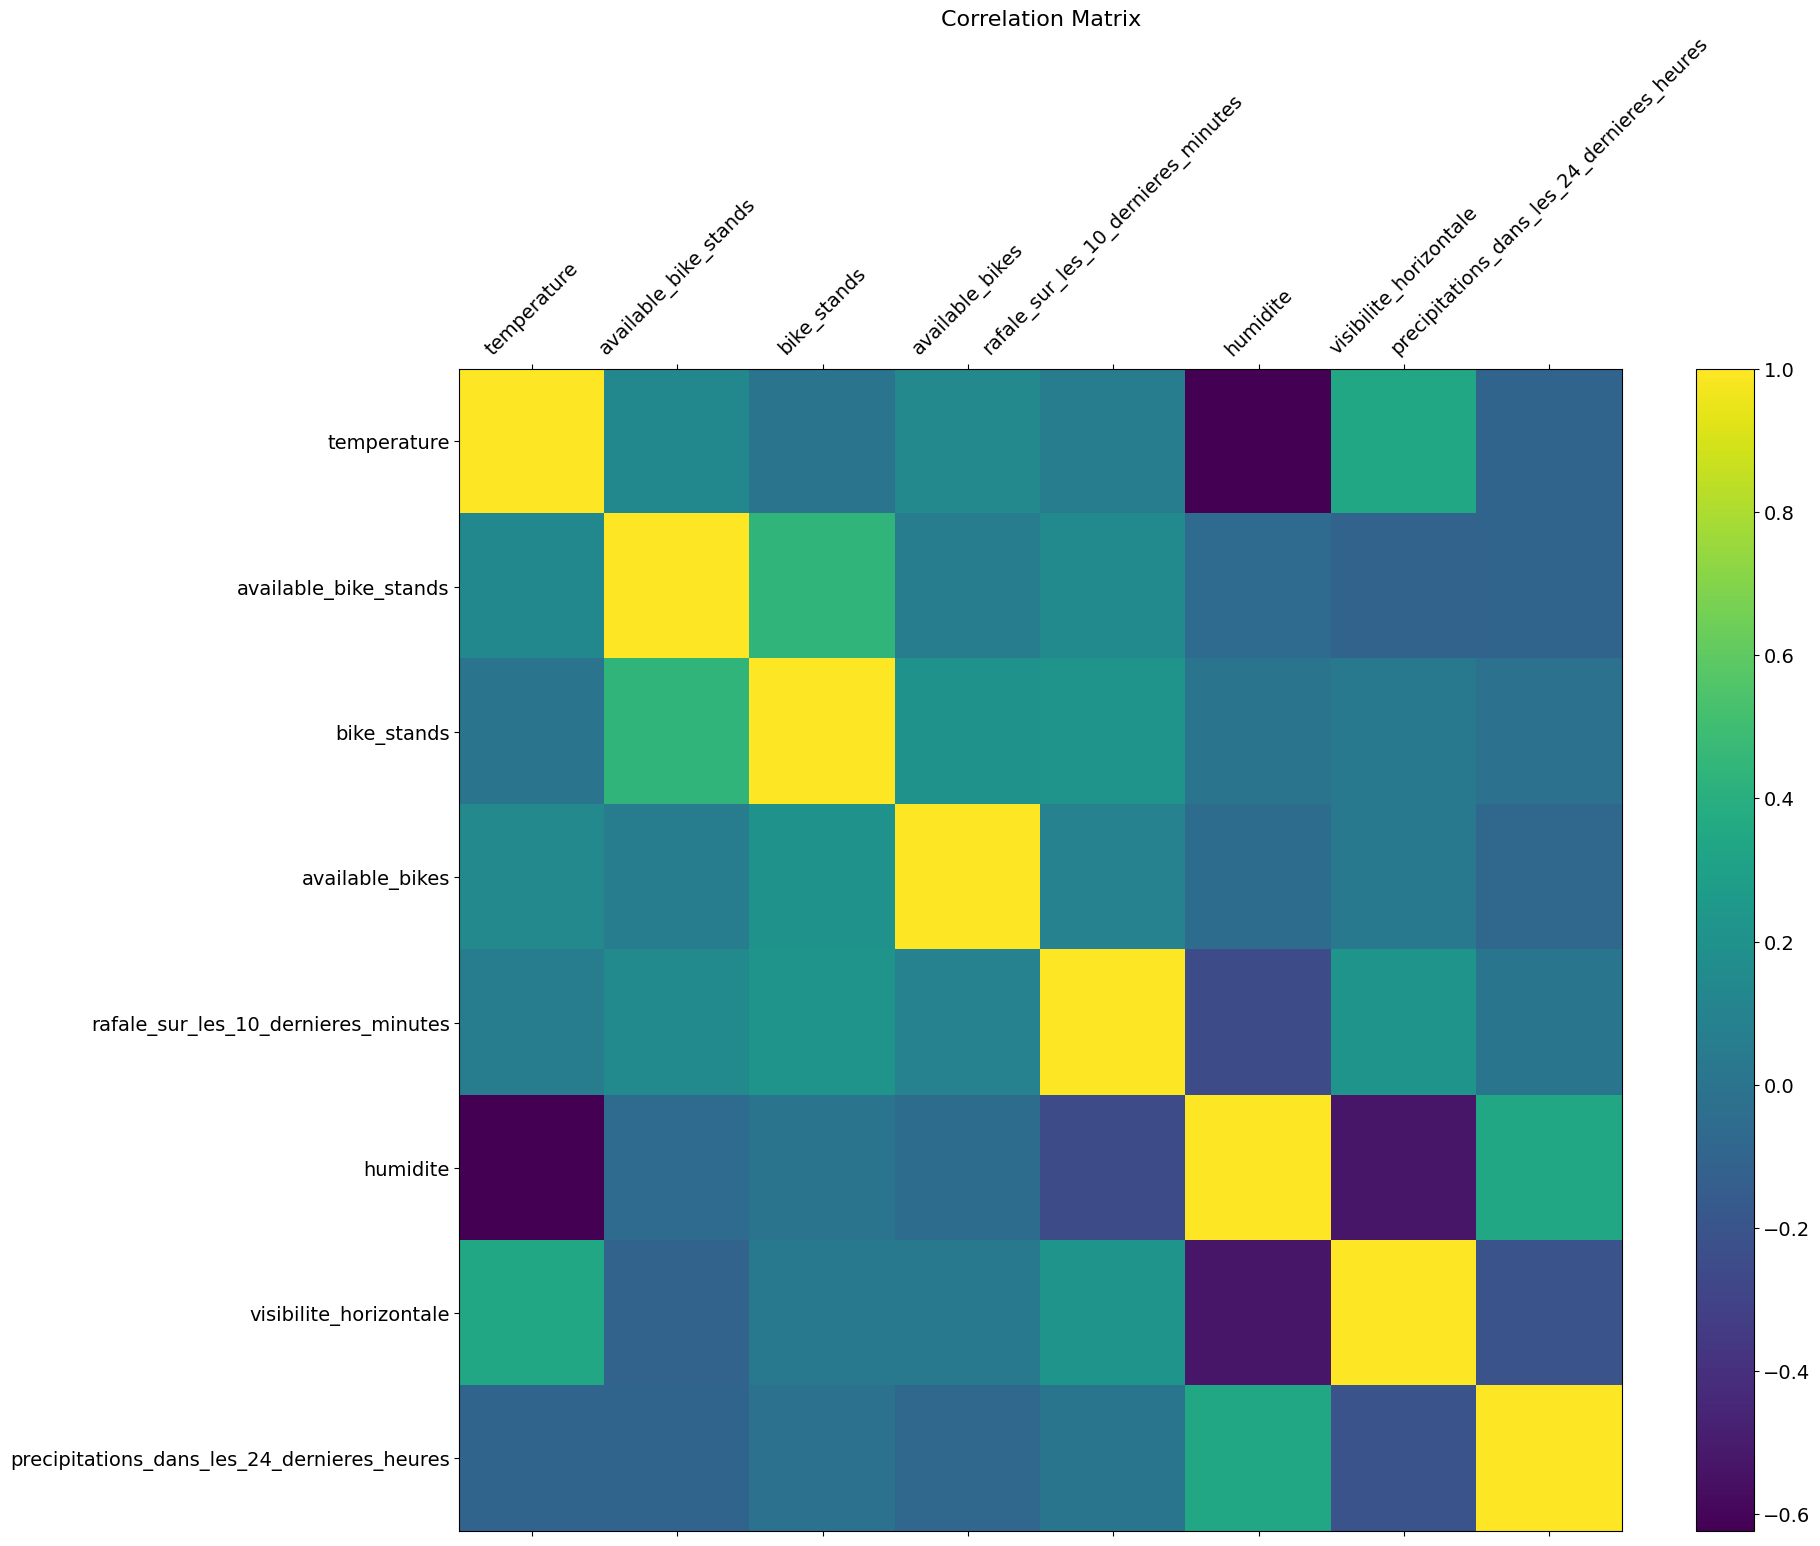

In [156]:
f = plt.figure(figsize=(19, 15))
plt.matshow(res.corr(), fignum=f.number)
plt.xticks(range(res.select_dtypes(['number']).shape[1]), res.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(res.select_dtypes(['number']).shape[1]), res.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [184]:
synop = synop.rename(columns={ k : clean_string(k) for k in synop.columns})

In [198]:
synop.to_csv("../open_data_soft/meteo_filtered.csv", index=False)
osm_bicycle.to_csv("../open_data_soft/osm_bicycle_filtered.csv", index=False)

In [196]:
df2 = pd.merge(osm_bicycle, synop, how="left", on=["date_day","departement"])

In [197]:
df2.head()

,capacite,type_accroche,mobilier,acces,gratuit,protection,couverture,lumiere,date_maj,ville_x,departement,region_x,date_day,pression_au_niveau_mer,temperature,humidite,visibilite_horizontale,temps_present,rafales_sur_une_periode,etat_du_sol,precipitations_dans_les_24_dernieres_heures,region_y,ville_y
0,300.0,None,AUTRE,LIBRE ACCES,true,AUTRE,true,None,2024-01-24,haguenau,bas_rhin,grand_est,2024-01-24,102640.0,285.85,79.0,60000.0,0.0,16.5,0.0,0.6,grand_est,holtzheim
1,300.0,None,AUTRE,LIBRE ACCES,true,AUTRE,true,None,2024-01-24,haguenau,bas_rhin,grand_est,2024-01-24,102650.0,283.95,74.0,60000.0,0.0,10.1,0.0,0.6,grand_est,holtzheim
2,300.0,None,AUTRE,LIBRE ACCES,true,AUTRE,true,None,2024-01-24,haguenau,bas_rhin,grand_est,2024-01-24,102780.0,283.75,69.0,59280.0,0.0,15.1,0.0,0.6,grand_est,holtzheim
3,300.0,None,AUTRE,LIBRE ACCES,true,AUTRE,true,None,2024-01-24,haguenau,bas_rhin,grand_est,2024-01-24,102800.0,285.45,91.0,4740.0,63.0,15.5,2.0,1.4,grand_est,holtzheim
4,300.0,None,AUTRE,LIBRE ACCES,true,AUTRE,true,None,2024-01-24,haguenau,bas_rhin,grand_est,2024-01-24,102900.0,287.65,62.0,43470.0,0.0,13.7,0.0,2.6,grand_est,holtzheim


In [330]:
synop.head()

,date_day,pression_au_niveau_mer,temperature,humidite,visibilite_horizontale,temps_present,rafales_sur_une_periode,etat_du_sol,precipitations_dans_les_24_dernieres_heures,departement,region,ville
0,2010-01-05,100280.0,275.75,100.0,4000.0,50.0,2.1,NaN,NaN,aveyron,occitanie,millau
1,2010-01-05,100990.0,305.45,69.0,50000.0,2.0,NaN,NaN,NaN,nan,nan,nan
2,2010-01-05,100720.0,273.65,87.0,12000.0,2.0,5.1,NaN,NaN,calvados,normandie,carpiquet
3,2010-01-05,100750.0,276.95,73.0,25000.0,2.0,7.2,NaN,NaN,finistere,bretagne,guipavas
4,2010-01-05,NaN,274.45,67.0,NaN,75.0,NaN,NaN,NaN,hautes_alpes,provence_alpes_cote_dazur,embrun


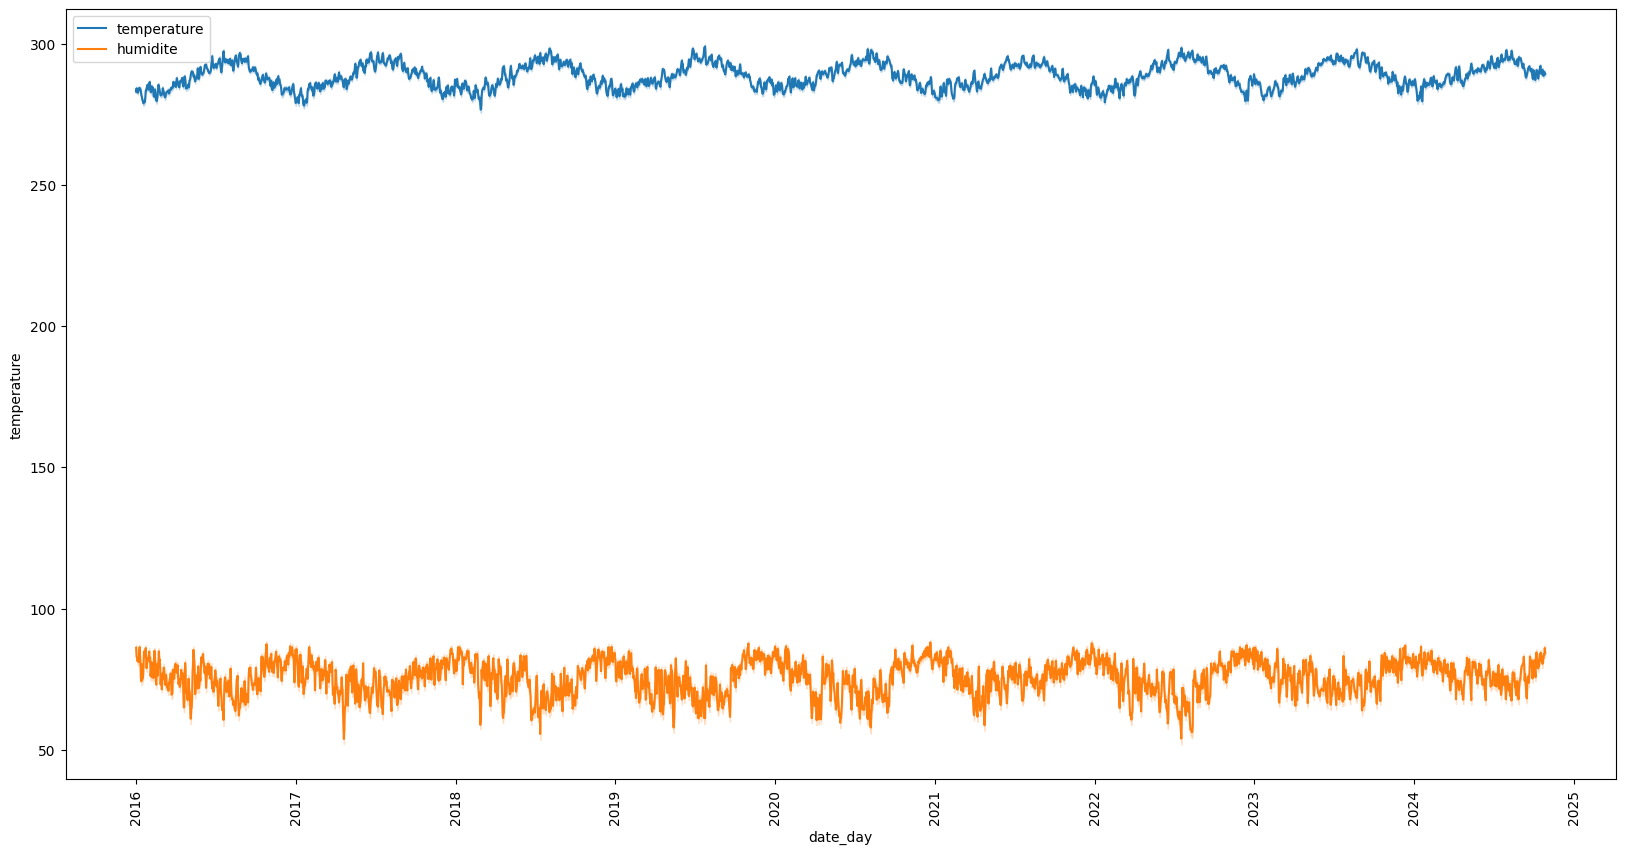

In [333]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
for col in ["temperature", "humidite"]:
    sns.lineplot(data=synop.query("date_day>='2016-01-01'"), x='date_day', y = col, label = col)


In [242]:
df2['date_mois'] = df2["date_day"].dt.strftime('%Y-%m')

In [200]:
df2 = df2.rename(columns={
    "ville_x" : "ville",
    "ville_y" : "ville_station_meteo",
    "region_x" : "region",
    "region_y" : "region_station_meteo",
})

In [243]:
res2 = df2.groupby(['date_mois','ville',"ville_station_meteo"], as_index=False).agg(
    {
        'capacite': 'mean', 
        "pression_au_niveau_mer": "mean",
        "temperature" : "mean",
        'rafales_sur_une_periode' : 'mean',
        'humidite' : 'mean',
        'visibilite_horizontale':'mean', 
        'precipitations_dans_les_24_dernieres_heures' : 'mean',
    }
)

In [244]:
res2 = res2.dropna()

In [245]:
res2.head()

,date_mois,ville,ville_station_meteo,capacite,pression_au_niveau_mer,temperature,rafales_sur_une_periode,humidite,visibilite_horizontale,precipitations_dans_les_24_dernieres_heures
0,2010-01,colomiers,blagnac,2.0,101868.750,279.500,8.4000,77.750,25250.0,0.0
2,2010-03,colomiers,blagnac,5.0,102194.375,283.950,11.9875,70.375,25812.5,0.1
5,2010-04,colomiers,blagnac,6.0,102323.750,287.025,4.5750,62.000,23500.0,0.2
6,2010-05,blotzheim,blotzheim,30.0,100783.750,282.500,5.1500,80.875,12375.0,5.0
7,2010-05,brest,guipavas,3.5,102106.250,290.425,5.5375,66.500,20500.0,0.0


<Axes: xlabel='date_mois', ylabel='capacite'>

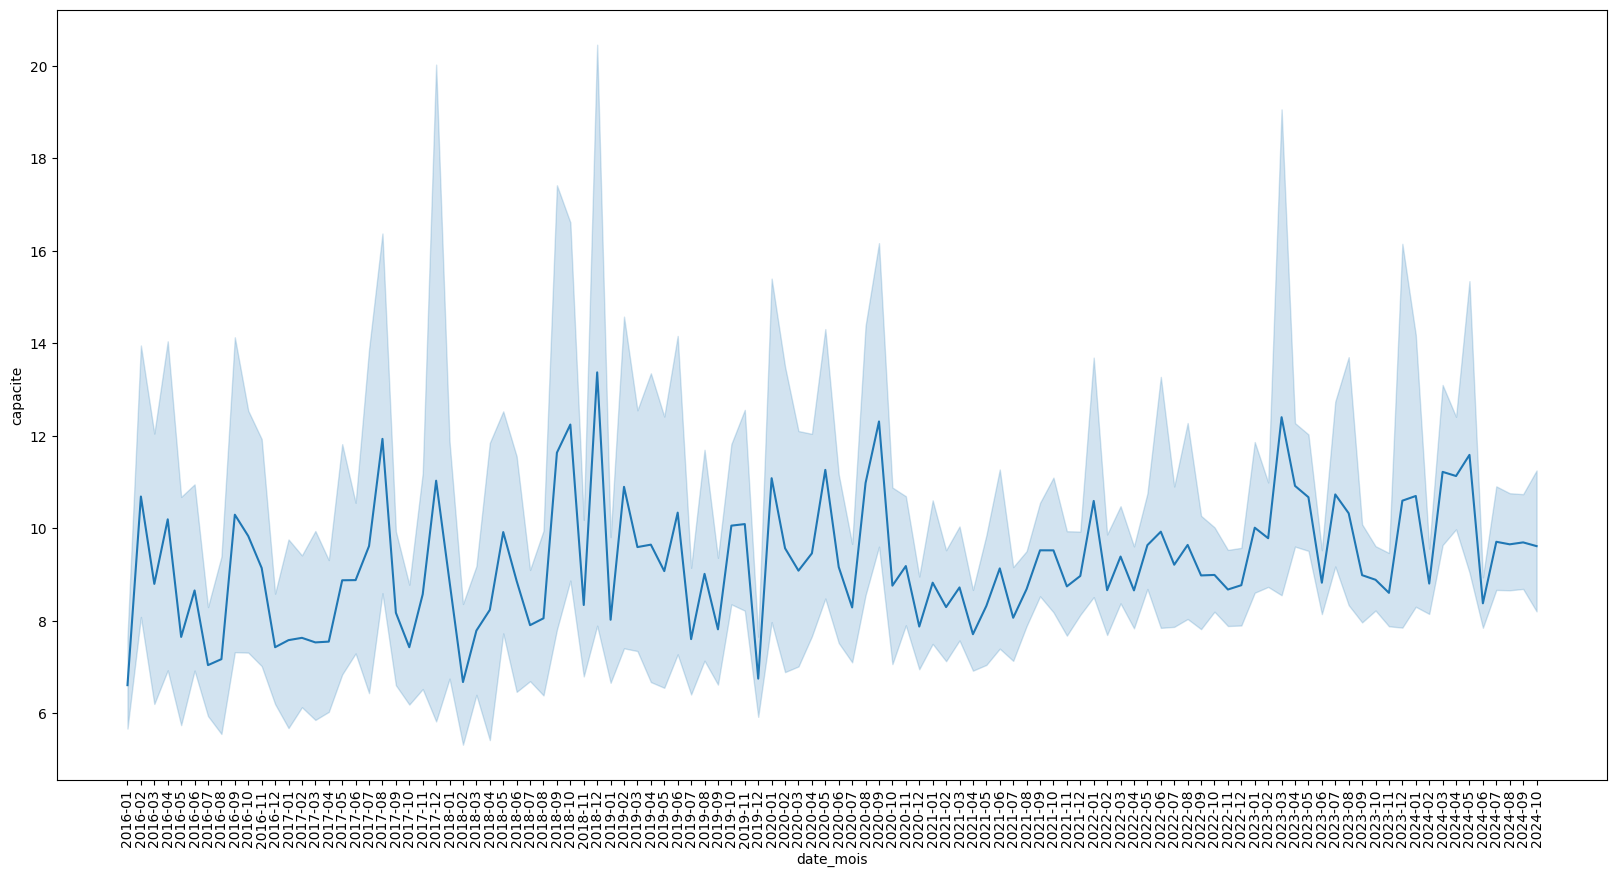

In [329]:
fig = plt.figure(figsize=(20,10))
plt.xticks(rotation = 90)
sns.lineplot(data=res2.query("date_mois>='2016-01'"), x="date_mois", y="capacite", label="capacite ()")

In [247]:
for col in res2.columns.drop(["date_mois", "ville", "ville_station_meteo"]):
    res2[f"{col}_norm"] = res2[col].apply(lambda x: (x-res2[col].mean()) /res2[col].std() )

In [248]:
res2["ville"].value_counts()

rennes            110
nantes            110
montpellier        91
tours              88
nancy              87
                 ... 
bassemberg          1
arrens_marsous      1
quedillac           1
sandouville         1
veyre_monton        1
Name: ville, Length: 2948, dtype: int64

In [249]:
res2_ville = res2.query("ville == 'nantes'")
res2_ville

,date_mois,ville,ville_station_meteo,capacite,pression_au_niveau_mer,temperature,rafales_sur_une_periode,humidite,visibilite_horizontale,precipitations_dans_les_24_dernieres_heures,capacite_norm,pression_au_niveau_mer_norm,temperature_norm,rafales_sur_une_periode_norm,humidite_norm,visibilite_horizontale_norm,precipitations_dans_les_24_dernieres_heures_norm
64,2011-10,nantes,saint_aignan_grandlieu,11.000000,102000.000000,286.162500,3.400000,92.125000,7625.000000,0.200000,0.108168,0.393069,-0.151168,-1.240404,1.364931,-1.551357,-0.411135
73,2011-11,nantes,saint_aignan_grandlieu,9.333333,100546.250000,285.062500,6.100000,89.250000,13125.000000,0.200000,-0.015628,-1.444660,-0.325593,-0.341685,1.127289,-1.096687,-0.411135
86,2012-02,nantes,saint_aignan_grandlieu,22.000000,102352.500000,271.625000,8.625000,74.625000,7000.000000,0.000000,0.925219,0.838675,-2.456352,0.498784,-0.081588,-1.603024,-0.457768
466,2014-06,nantes,saint_aignan_grandlieu,4.000000,101291.250000,291.700000,5.137500,70.125000,24000.000000,2.000000,-0.411774,-0.502883,0.726903,-0.662061,-0.453551,-0.197680,0.008558
621,2015-03,nantes,saint_aignan_grandlieu,35.000000,101248.750000,281.275000,6.562500,87.250000,14632.500000,4.425000,1.890826,-0.556608,-0.926170,-0.187737,0.961972,-0.972066,0.573978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14032,2024-06,nantes,saint_aignan_grandlieu,11.423077,101704.612069,290.467672,6.303017,74.387931,20794.525862,2.129741,0.139593,0.019660,0.531495,-0.274109,-0.101184,-0.462668,0.038809
14444,2024-07,nantes,saint_aignan_grandlieu,7.266667,101754.683333,292.374500,6.512167,74.003333,23380.516667,0.941000,-0.169134,0.082957,0.833858,-0.204491,-0.132974,-0.248891,-0.238362
14897,2024-08,nantes,saint_aignan_grandlieu,11.500000,101601.578947,293.177303,5.464803,78.190789,21387.796053,0.592763,0.145307,-0.110587,0.961156,-0.553116,0.213153,-0.413624,-0.319558
15275,2024-09,nantes,saint_aignan_grandlieu,8.230769,101337.091346,288.553606,6.359856,83.838942,21023.149038,4.257590,-0.097523,-0.444934,0.227985,-0.255189,0.680020,-0.443768,0.534944


In [229]:
for col in res2_ville.columns:
    print(f"'{col}',")

'date_day',
'ville',
'ville_station_meteo',
'capacite',
'pression_au_niveau_mer',
'temperature',
'rafales_sur_une_periode',
'humidite',
'visibilite_horizontale',
'precipitations_dans_les_24_dernieres_heures',
'capacite_norm',
'pression_au_niveau_mer_norm',
'temperature_norm',
'rafales_sur_une_periode_norm',
'humidite_norm',
'visibilite_horizontale_norm',
'precipitations_dans_les_24_dernieres_heures_norm',


In [250]:
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [251]:
res2_ville_without_outliers = remove_outliers_iqr(res2_ville,[
    'capacite_norm',
    'pression_au_niveau_mer_norm',
    'temperature_norm',
    'rafales_sur_une_periode_norm',
    'humidite_norm',
    'visibilite_horizontale_norm',
    'precipitations_dans_les_24_dernieres_heures_norm'
    ])

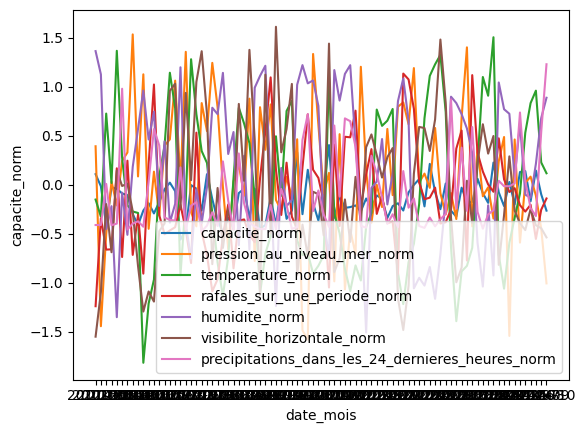

In [252]:

for col in [
    'capacite_norm',
    'pression_au_niveau_mer_norm',
    'temperature_norm',
    'rafales_sur_une_periode_norm',
    'humidite_norm',
    'visibilite_horizontale_norm',
    'precipitations_dans_les_24_dernieres_heures_norm'
    ]:
    sns.lineplot(data=res2_ville_without_outliers, x = "date_mois", y=col, label= col)
plt.legend()

In [286]:
res2_ville = res2_ville.drop(columns=[c for c in res2_ville.columns if c.endswith("_norm")])

In [322]:
res2_ville.corr()

C:\Users\Thibault DOUX\AppData\Local\Temp\ipykernel_22900\1548586119.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  res2_ville.corr()


,capacite,pression_au_niveau_mer,temperature,rafales_sur_une_periode,humidite,visibilite_horizontale,precipitations_dans_les_24_dernieres_heures
capacite,1.000000,-0.045701,0.005539,-0.026638,-0.064980,0.077296,-0.029845
pression_au_niveau_mer,-0.045701,1.000000,-0.013036,-0.385116,-0.160170,0.134833,-0.415111
temperature,0.005539,-0.013036,1.000000,-0.338799,-0.510279,0.642055,-0.112477
rafales_sur_une_periode,-0.026638,-0.385116,-0.338799,1.000000,-0.037377,-0.134462,0.222297
humidite,-0.064980,-0.160170,-0.510279,-0.037377,1.000000,-0.626599,0.343456
visibilite_horizontale,0.077296,0.134833,0.642055,-0.134462,-0.626599,1.000000,-0.230401
precipitations_dans_les_24_dernieres_heures,-0.029845,-0.415111,-0.112477,0.222297,0.343456,-0.230401,1.000000


C:\Users\Thibault DOUX\AppData\Local\Temp\ipykernel_22900\3299325511.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(res2_ville.corr(), fignum=f.number)


Text(0.5, 1.0, 'Correlation Matrix')

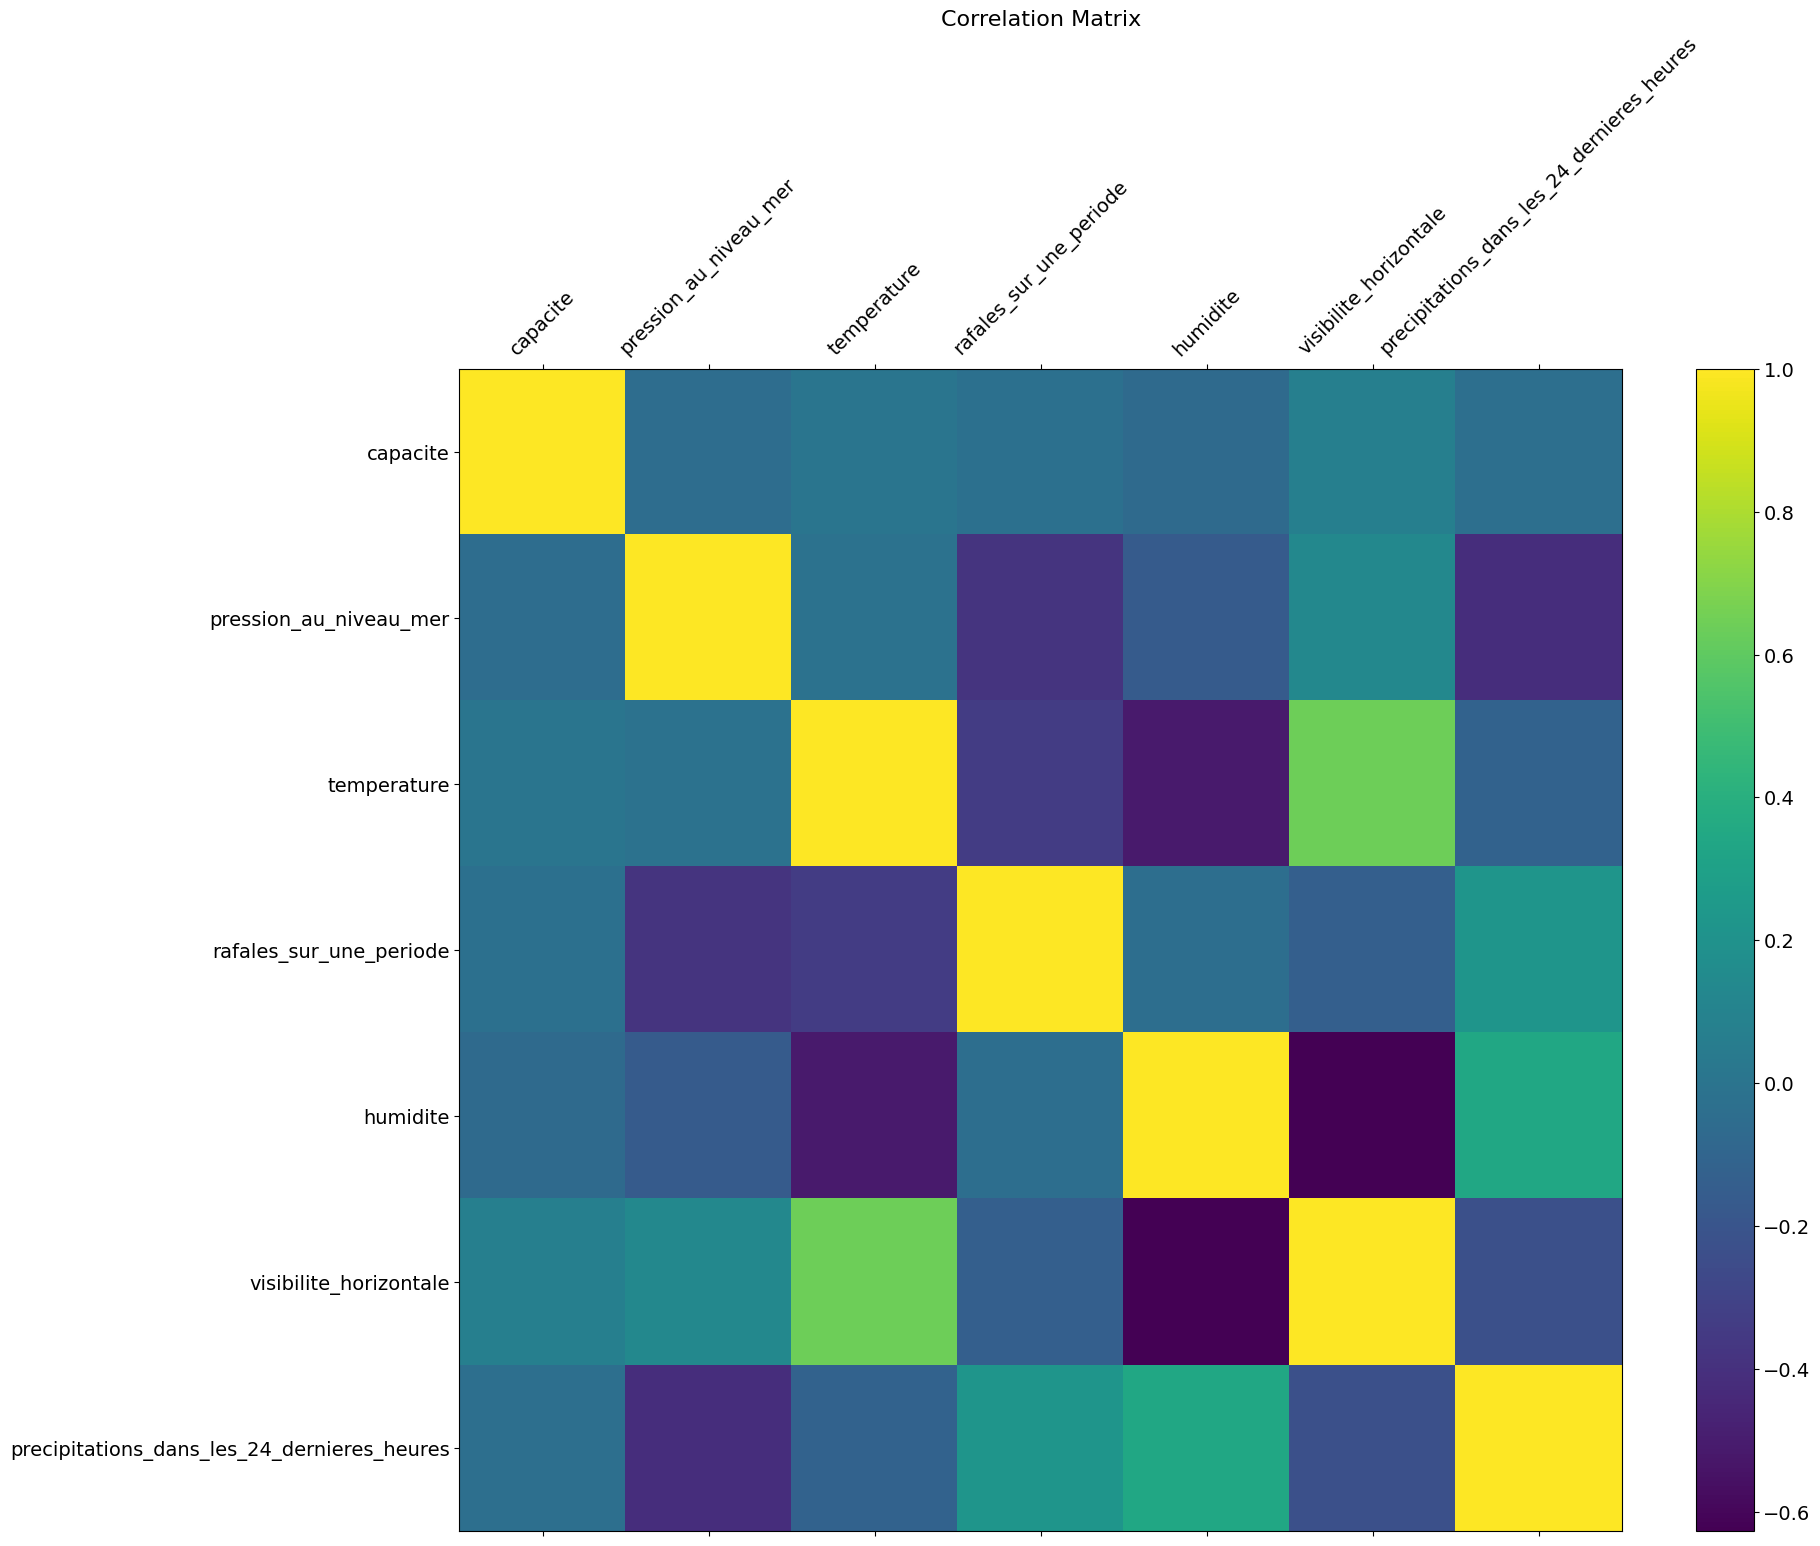

In [287]:
f = plt.figure(figsize=(19, 15))
plt.matshow(res2_ville.corr(), fignum=f.number)
plt.xticks(range(res2_ville.select_dtypes(['number']).shape[1]), res2_ville.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(res2_ville.select_dtypes(['number']).shape[1]), res2_ville.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

# Prix conso 

In [157]:
prix_conso  = pd.read_parquet("../open_data_soft/economicref-france-indice-prix-consommation.parquet")

In [158]:
prix_conso.head()

,periode,indice,valeur,code,type,sous_type,base,population,zone,coicop_code,coicop_texte,serie_arretee,insee_idbank
0,2012-01-01,Indice des prix à la consommation - Base 2015 ...,98.22,A,Indice des prix à la consommation,Valeurs mensuelles,Base 2015,Ensemble des ménages,France,01.1.3,Poissons et fruits de mer,Non,001763437
1,2012-01-01,Indice des prix à la consommation - Base 2015 ...,85.27,A,Indice des prix à la consommation,Valeurs mensuelles,Base 2015,Ensemble des ménages,France,01.1.3.4,Fruits de mer surgelés,Non,001763441
2,2012-01-01,Indice des prix à la consommation - Base 2015 ...,101.73,A,Indice des prix à la consommation,Valeurs mensuelles,Base 2015,Ensemble des ménages,France,01.1.4,"Lait, fromage et oeufs",Non,001763444
3,2012-01-01,Indice des prix à la consommation - Base 2015 ...,79.78,A,Indice des prix à la consommation,Valeurs mensuelles,Base 2015,Ensemble des ménages,France,02.2.0.3,Autres produits du tabac,Non,001763507
4,2012-01-01,Indice des prix à la consommation - Base 2015 ...,94.48,A,Indice des prix à la consommation,Valeurs mensuelles,Base 2015,Ensemble des ménages,France,03.1.4.1,Nettoyage d'articles d'habillement,Non,001763520


In [159]:
prix_conso = prix_conso[["periode","valeur","code","population","zone","coicop_texte"]].rename(columns={
    "periode" : "date_day",
    "coicop_texte" : "produit_de_consommation",
})

In [160]:
prix_conso.head()

,date_day,valeur,code,population,zone,produit_de_consommation
0,2012-01-01,98.22,A,Ensemble des ménages,France,Poissons et fruits de mer
1,2012-01-01,85.27,A,Ensemble des ménages,France,Fruits de mer surgelés
2,2012-01-01,101.73,A,Ensemble des ménages,France,"Lait, fromage et oeufs"
3,2012-01-01,79.78,A,Ensemble des ménages,France,Autres produits du tabac
4,2012-01-01,94.48,A,Ensemble des ménages,France,Nettoyage d'articles d'habillement


In [162]:
prix_conso["date_day"] = pd.to_datetime(prix_conso["date_day"], format="%Y-%m-%d")

In [163]:
prix_conso["valeur"].dtype

dtype('float64')

In [259]:
def filter_rows_by_substrings(df, column, substrings):
    pattern = '|'.join(substrings)
    return df[df[column].str.contains(pattern, case=False, na=False)]

In [260]:
prix_conso_filtr = filter_rows_by_substrings(prix_conso, column="produit_de_consommation", substrings  = ["transp", 'passager'])
prix_conso_filtr.head()

,date_day,valeur,code,population,zone,produit_de_consommation
23,2012-01-01,80.58,A,Ensemble des ménages,France métropolitaine,Transport maritime ou fluvial de passagers
26,2012-01-01,-2.30,A,Ensemble des ménages,France métropolitaine,Services : Transports
35,2012-02-01,90.53,A,Ensemble des ménages,La réunion,Services : Transports
105,2012-03-01,97.77,A,Ensemble des ménages,France métropolitaine,Transport combiné de passagers
135,2012-04-01,101.68,A,Ensemble des ménages,France,Transport aérien de passagers


In [261]:
prix_conso_filtr["produit_de_consommation"].unique()

array(['Transport maritime ou fluvial de passagers',
       'Services : Transports', 'Transport combiné de passagers',
       'Transport aérien de passagers', 'Transport maritime de passagers',
       'Transports', 'Transport ferroviaire de passagers',
       'Transport de passagers en taxi ou voiture de location avec chauffeur',
       'Services : Transports et communications',
       'Services de transport divers', 'Assurance transport',
       'Transport routier de passagers',
       'Cures thermales, transport sanitaire et location de matériel thérapeutique',
       'Transport de passagers par autobus et autocar',
       'Transport fluvial de passagers',
       'Transport de passagers par train', 'Services de transport',
       'Transports, communications et hôtellerie (TCH)',
       'Transport aérien international',
       'Transport de passagers par métro et tramway',
       'Transport aérien intérieur'], dtype=object)

In [266]:
prix_conso_filtr = prix_conso_filtr.query("date_day >= '2016-01-01'")

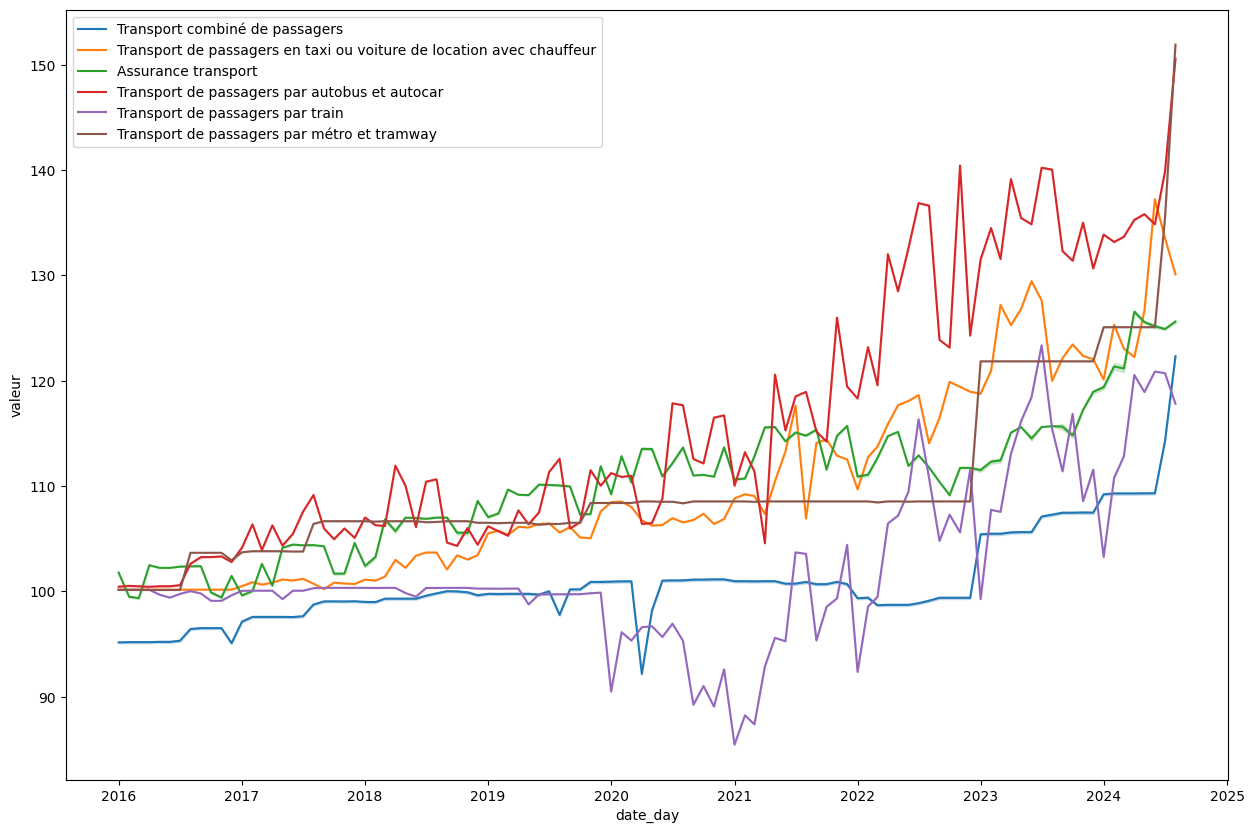

In [314]:
fig = plt.figure(figsize=(15,10))
for prod in [
        'Transport combiné de passagers',
       'Transport de passagers en taxi ou voiture de location avec chauffeur',
       'Assurance transport',
       'Transport de passagers par autobus et autocar',
       'Transport de passagers par train',
       'Transport de passagers par métro et tramway',
]:
    sns.lineplot(data=prix_conso_filtr.query(f'produit_de_consommation=="{prod}"'), x='date_day', y="valeur", label=prod)


In [310]:
prix_conso_metro_tram = prix_conso_filtr.query('produit_de_consommation=="Transport de passagers par métro et tramway"')[['date_day','valeur']].rename(columns={"valeur": "indice_conso_transport_metro_tramwway"})

In [311]:
prix_conso_metro_tram

,date_day,indice_conso_transport_metro_tramwway
12717,2016-06-01,100.14
13016,2017-01-01,103.72
14227,2022-12-01,108.55
15331,2024-04-01,125.09
15414,2023-06-01,121.85
...,...,...
433745,2023-04-01,121.85
434040,2021-03-01,108.51
441307,2020-05-01,108.55
441808,2016-06-01,100.14


<Axes: xlabel='date_day', ylabel='indice_conso_transport_metro_tramwway'>

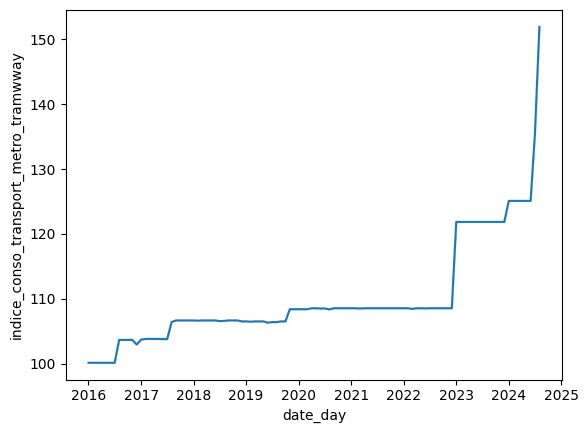

In [313]:
sns.lineplot(data=prix_conso_metro_tram, x="date_day", y="indice_conso_transport_metro_tramwway")

In [279]:
prix_carburant = pd.read_csv("../open_data_soft/prix-des-carburants-j-1.csv", sep=";")

C:\Users\Thibault DOUX\AppData\Local\Temp\ipykernel_22900\2102546317.py:1: DtypeWarning: Columns (20,23) have mixed types. Specify dtype option on import or set low_memory=False.
  prix_carburant = pd.read_csv("../open_data_soft/prix-des-carburants-j-1.csv", sep=";")


In [280]:
prix_carburant.head()

,Identifiant,Code Postal,Présence,Adresse,Nom Officiel Commune / Arrondissement Municipal Majuscule,Automate 24-24,Timetable,Carburant,Rupture,Mise à jour,Prix Gazole,Prix SP95,Prix SP98,Prix GPLc,Prix E10,Prix E85,Services,Marque,Nom,Geo Point,Code officiel commune ou arrondissement,Code Officiel EPCI,Nom Officiel EPCI,Code Officiel Département,Nom Officiel Département,Code Officiel Région,Nom Officiel Région
0,46300011,46300,R,9 BOULEVARD DE LA MADELEINE,GOURDON,Oui,"{""Dimanche"": {""fermeture"": ""13.00"", ""ouvert"": ...","Gazole,E10,SP98","SP95,E85,GPLc",2024-09-19T08:30:27+02:00,0.001653,NaN,0.001869,NaN,0.001759,NaN,"Relais colis,Boutique alimentaire,Boutique non...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6201001,6200,R,606 boulevard du mercantour,NICE,Non,"{""Dimanche"": {""fermeture"": ""00.00"", ""ouvert"": ...","Gazole,SP95,E10,SP98","E85,E85",2024-09-21T22:46:00+02:00,0.001574,0.001724,0.001749,0.000940,0.001645,NaN,"Vente de pétrole lampant,Station de gonflage,C...",Carrefour,CARREFOUR NICE LINGOSTIERE,"43.70836, 7.26305",06088,200030195.0,Métropole Nice Côte d'Azur,06,Alpes-Maritimes,93.0,Provence-Alpes-Côte d'Azur
2,76420001,76420,R,Avenue du Maréchal Juin,BOIS-GUILLAUME,Oui,"{""Dimanche"": {""ouvert"": 1}, ""Jeudi"": {""ouvert""...",Gazole,"GPLc,SP95",2024-05-06T17:49:38+02:00,0.001675,NaN,NaN,NaN,NaN,0.000899,DAB (Distributeur automatique de billets),Système U,SUPER U,"49.46334, 1.12358",76108,200023414.0,Métropole Rouen Normandie,76,Seine-Maritime,28.0,Normandie
3,71400013,71400,R,AVENUE DU 2 EME DRAGON RD 978,AUTUN,NaN,NaN,"Gazole,E10","SP95,E85,GPLc,SP98",2024-09-05T00:01:00+02:00,0.001599,NaN,NaN,NaN,0.001686,NaN,"Relais colis,Boutique alimentaire,Boutique non...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49120001,49120,R,PARC COMMERCIAL DU CHALET,CHEMILLÉ-EN-ANJOU,Oui,"{""Dimanche"": {""ouvert"": 1}, ""Jeudi"": {""ouvert""...","E85,E10",SP95,2024-07-09T09:00:30+02:00,0.001699,NaN,NaN,0.000999,0.001789,0.000789,"Laverie,Relais colis,Restauration à emporter,R...",Système U,Super U CHEMILLE,"47.2081335112, -0.714938497091",49092,200060010.0,CA Mauges Communauté,49,Maine-et-Loire,52.0,Pays de la Loire


In [291]:
jcdecaux.head()

,number,name,address,position,banking,bonus,status,contract_name,bike_stands,available_bike_stands,available_bikes,last_update,ville,departement,region,zip_code,department_code,region_code,gps_lng,gps_lat,date_day,date
0,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31000.0,31,76,1.444205,43.604626,2024-10-27,2024-10-27 14:31:33
1,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31100.0,31,76,1.395169,43.561822,2024-10-27,2024-10-27 14:31:33
2,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31200.0,31,76,1.433805,43.638167,2024-10-27,2024-10-27 14:31:33
3,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31300.0,31,76,1.390343,43.605107,2024-10-27,2024-10-27 14:31:33
4,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31400.0,31,76,1.453135,43.561103,2024-10-27,2024-10-27 14:31:33


In [294]:
len(osm_bicycle)

115654

In [289]:
osm_bicycle.head()

,capacite,type_accroche,mobilier,acces,gratuit,protection,couverture,lumiere,date_maj,ville,departement,region,date_day
0,300.0,None,AUTRE,LIBRE ACCES,true,AUTRE,true,None,2024-01-24,haguenau,bas_rhin,grand_est,2024-01-24
1,8.0,CADRE ET ROUE,ARCEAU,PRIVE,true,AUTRE,true,None,2024-01-30,caen,calvados,normandie,2024-01-30
2,50.0,None,AUTRE,None,false,CONSIGNE COLLECTIVE FERMEE,true,true,2024-03-20,pont_a_mousson,meurthe_et_moselle,grand_est,2024-03-20
3,8.0,None,AUTRE,LIBRE ACCES,true,CONSIGNE COLLECTIVE FERMEE,true,true,2024-03-25,wingen_sur_moder,bas_rhin,grand_est,2024-03-25
4,20.0,CADRE ET ROUE,ARCEAU,PRIVE,None,AUTRE,true,None,2024-04-04,la_tronche,isere,auvergne_rhone_alpes,2024-04-04


In [303]:
list(set(jcdecaux["ville"].unique()) & set(osm_bicycle["ville"].unique()))

['mulhouse',
 'rouen',
 'amiens',
 'creteil',
 'nancy',
 'besancon',
 'nantes',
 'toulouse',
 'valence']

In [317]:
prix_conso_metro_tram.head()

,date_day,indice_conso_transport_metro_tramwway
12717,2016-06-01,100.14
13016,2017-01-01,103.72
14227,2022-12-01,108.55
15331,2024-04-01,125.09
15414,2023-06-01,121.85


In [315]:
velo_vs_prix_transports = pd.merge(jcdecaux, prix_conso_metro_tram, how='left', on="date_day")

In [316]:
velo_vs_prix_transports

,number,name,address,position,banking,bonus,status,contract_name,bike_stands,available_bike_stands,available_bikes,last_update,ville,departement,region,zip_code,department_code,region_code,gps_lng,gps_lat,date_day,date,indice_conso_transport_metro_tramwway
0,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31000.0,31,76,1.444205,43.604626,2024-10-27,2024-10-27 14:31:33,NaN
1,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31100.0,31,76,1.395169,43.561822,2024-10-27,2024-10-27 14:31:33,NaN
2,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31200.0,31,76,1.433805,43.638167,2024-10-27,2024-10-27 14:31:33,NaN
3,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31300.0,31,76,1.390343,43.605107,2024-10-27,2024-10-27 14:31:33,NaN
4,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31400.0,31,76,1.453135,43.561103,2024-10-27,2024-10-27 14:31:33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11254,157,00157 - URSS - PEYROUSET,16 AV DE L'U.R.S.S,b'\x01\x01\x00\x00\x00\nH\xfb\x1f`-\xf7?\x02\x...,False,False,OPEN,toulouse,19,13,6,2024-10-28 07:55:24,toulouse,haute_garonne,occitanie,31100.0,31,76,1.395169,43.561822,2024-10-28,2024-10-28 07:55:24,NaN
11255,157,00157 - URSS - PEYROUSET,16 AV DE L'U.R.S.S,b'\x01\x01\x00\x00\x00\nH\xfb\x1f`-\xf7?\x02\x...,False,False,OPEN,toulouse,19,13,6,2024-10-28 07:55:24,toulouse,haute_garonne,occitanie,31200.0,31,76,1.433805,43.638167,2024-10-28,2024-10-28 07:55:24,NaN
11256,157,00157 - URSS - PEYROUSET,16 AV DE L'U.R.S.S,b'\x01\x01\x00\x00\x00\nH\xfb\x1f`-\xf7?\x02\x...,False,False,OPEN,toulouse,19,13,6,2024-10-28 07:55:24,toulouse,haute_garonne,occitanie,31300.0,31,76,1.390343,43.605107,2024-10-28,2024-10-28 07:55:24,NaN
11257,157,00157 - URSS - PEYROUSET,16 AV DE L'U.R.S.S,b'\x01\x01\x00\x00\x00\nH\xfb\x1f`-\xf7?\x02\x...,False,False,OPEN,toulouse,19,13,6,2024-10-28 07:55:24,toulouse,haute_garonne,occitanie,31400.0,31,76,1.453135,43.561103,2024-10-28,2024-10-28 07:55:24,NaN


In [304]:
velos_vs_parking = pd.merge(jcdecaux, osm_bicycle, how="left", on=["ville"])

In [305]:
velos_vs_parking.dropna()

,number,name,address,position,banking,bonus,status,contract_name,bike_stands,available_bike_stands,available_bikes,last_update,ville,departement_x,region_x,zip_code,department_code,region_code,gps_lng,gps_lat,date_day_x,date,capacite,type_accroche,mobilier,acces,gratuit,protection,couverture,lumiere,date_maj,departement_y,region_y,date_day_y
871,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31000.0,31,76,1.444205,43.604626,2024-10-27,2024-10-27 14:31:33,4.0,CADRE ET ROUE,ARCEAU,LIBRE ACCES,true,AUTRE,false,false,2024-06-22,haute_garonne,occitanie,2024-06-22
1183,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31000.0,31,76,1.444205,43.604626,2024-10-27,2024-10-27 14:31:33,20.0,CADRE ET ROUE,ARCEAU,LIBRE ACCES,true,AUTRE,false,true,2024-09-23,haute_garonne,occitanie,2024-09-23
1203,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31000.0,31,76,1.444205,43.604626,2024-10-27,2024-10-27 14:31:33,6.0,CADRE ET ROUE,ARCEAU,LIBRE ACCES,true,AUTRE,false,false,2024-06-22,haute_garonne,occitanie,2024-06-22
1210,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31000.0,31,76,1.444205,43.604626,2024-10-27,2024-10-27 14:31:33,10.0,CADRE,POTELET,LIBRE ACCES,true,AUTRE,false,false,2022-07-03,haute_garonne,occitanie,2022-07-03
2802,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31100.0,31,76,1.395169,43.561822,2024-10-27,2024-10-27 14:31:33,4.0,CADRE ET ROUE,ARCEAU,LIBRE ACCES,true,AUTRE,false,false,2024-06-22,haute_garonne,occitanie,2024-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6122935,157,00157 - URSS - PEYROUSET,16 AV DE L'U.R.S.S,b'\x01\x01\x00\x00\x00\nH\xfb\x1f`-\xf7?\x02\x...,False,False,OPEN,toulouse,19,13,6,2024-10-28 07:55:24,toulouse,haute_garonne,occitanie,31400.0,31,76,1.453135,43.561103,2024-10-28,2024-10-28 07:55:24,10.0,CADRE,POTELET,LIBRE ACCES,true,AUTRE,false,false,2022-07-03,haute_garonne,occitanie,2022-07-03
6124527,157,00157 - URSS - PEYROUSET,16 AV DE L'U.R.S.S,b'\x01\x01\x00\x00\x00\nH\xfb\x1f`-\xf7?\x02\x...,False,False,OPEN,toulouse,19,13,6,2024-10-28 07:55:24,toulouse,haute_garonne,occitanie,31500.0,31,76,1.477311,43.604020,2024-10-28,2024-10-28 07:55:24,4.0,CADRE ET ROUE,ARCEAU,LIBRE ACCES,true,AUTRE,false,false,2024-06-22,haute_garonne,occitanie,2024-06-22
6124839,157,00157 - URSS - PEYROUSET,16 AV DE L'U.R.S.S,b'\x01\x01\x00\x00\x00\nH\xfb\x1f`-\xf7?\x02\x...,False,False,OPEN,toulouse,19,13,6,2024-10-28 07:55:24,toulouse,haute_garonne,occitanie,31500.0,31,76,1.477311,43.604020,2024-10-28,2024-10-28 07:55:24,20.0,CADRE ET ROUE,ARCEAU,LIBRE ACCES,true,AUTRE,false,true,2024-09-23,haute_garonne,occitanie,2024-09-23
6124859,157,00157 - URSS - PEYROUSET,16 AV DE L'U.R.S.S,b'\x01\x01\x00\x00\x00\nH\xfb\x1f`-\xf7?\x02\x...,False,False,OPEN,toulouse,19,13,6,2024-10-28 07:55:24,toulouse,haute_garonne,occitanie,31500.0,31,76,1.477311,43.604020,2024-10-28,2024-10-28 07:55:24,6.0,CADRE ET ROUE,ARCEAU,LIBRE ACCES,true,AUTRE,false,false,2024-06-22,haute_garonne,occitanie,2024-06-22


<Axes: xlabel='date_day_x', ylabel='bike_stands'>

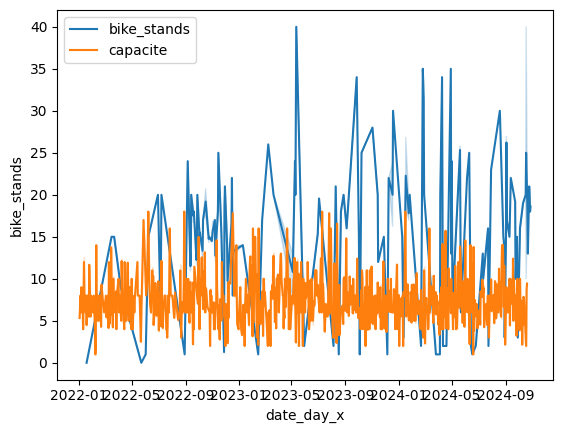

In [309]:
sns.lineplot(data=velos_vs_parking, x="date_day_x", y= "bike_stands", label="bike_stands")
sns.lineplot(data=remove_outliers_iqr(df=velos_vs_parking, columns=["capacite"]).query("date_day_y>='2022-01-01'"), x="date_day_y", y= "capacite", label="capacite")

In [318]:
jcdecaux.head()

,number,name,address,position,banking,bonus,status,contract_name,bike_stands,available_bike_stands,available_bikes,last_update,ville,departement,region,zip_code,department_code,region_code,gps_lng,gps_lat,date_day,date
0,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31000.0,31,76,1.444205,43.604626,2024-10-27,2024-10-27 14:31:33
1,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31100.0,31,76,1.395169,43.561822,2024-10-27,2024-10-27 14:31:33
2,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31200.0,31,76,1.433805,43.638167,2024-10-27,2024-10-27 14:31:33
3,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31300.0,31,76,1.390343,43.605107,2024-10-27,2024-10-27 14:31:33
4,186,00186 - DESBALS - BOUALAM,1 IMPASSE BACHAGA BOUALAM,b'\x01\x01\x00\x00\x00Dj\xda\xc54\x93\xf6?T\xe...,False,False,OPEN,toulouse,18,0,0,2024-10-27 14:31:33,toulouse,haute_garonne,occitanie,31400.0,31,76,1.453135,43.561103,2024-10-27,2024-10-27 14:31:33


In [319]:
jcdecaux['date_month'] = jcdecaux["date_day"].dt.month

In [321]:
import numpy as np 

bike_stands = jcdecaux.groupby('date_month')['bike_stands'].mean().reset_index()
bike_stands

,date_month,bike_stands
0,2022-01-18,0.000000
1,2022-03-16,15.000000
2,2022-03-22,15.000000
3,2022-04-06,9.000000
4,2022-05-23,0.000000
...,...,...
129,2024-10-22,13.000000
130,2024-10-25,21.000000
131,2024-10-26,20.750000
132,2024-10-27,18.000000
